In [ ]:
!pip install -q kaggle



In [ ]:
!mkdir ~/.kaggle

In [ ]:
!kaggle datasets download -d amulyas/penguin-size-dataset

Dataset URL: https://www.kaggle.com/datasets/amulyas/penguin-size-dataset
License(s): MIT
  0% 0.00/2.85k [00:00<?, ?B/s]
100% 2.85k/2.85k [00:00<00:00, 4.50MB/s]


In [ ]:
!unzip /content/penguin-size-dataset.zip

Archive:  /content/penguin-size-dataset.zip
  inflating: penguins_size.csv       


In [ ]:

import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# prompt: load a file

import pandas as pd
df = pd.read_csv('/content/penguins_size.csv')

In [ ]:
df



,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [ ]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
df.shape

(344, 7)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [ ]:
df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean(), inplace=True)
df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].median(), inplace=True)
df['body_mass_g'].fillna(df['body_mass_g'].mode()[0], inplace=True)


In [ ]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      0
culmen_depth_mm       0
flipper_length_mm     2
body_mass_g           0
sex                  10
dtype: int64

In [ ]:
df.fillna(method='ffill', inplace=True)  # Forward fill
df.fillna(method='bfill', inplace=True)  # Backward fill


In [ ]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [ ]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,43.921930,17.152035,200.936047,4199.418605
std,5.443643,1.969060,14.042064,800.197923
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.600000,190.000000,3550.000000
50%,44.250000,17.300000,197.000000,4025.000000
75%,48.500000,18.700000,213.250000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='culmen_length_mm'>

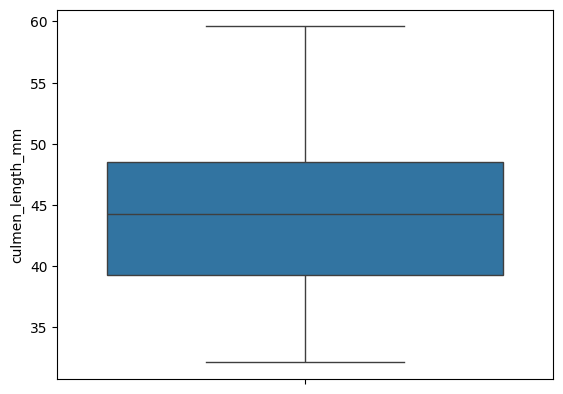

In [ ]:
sns.boxplot(df.culmen_length_mm)


# *Visualizations*
***1.Univariate Analysis***

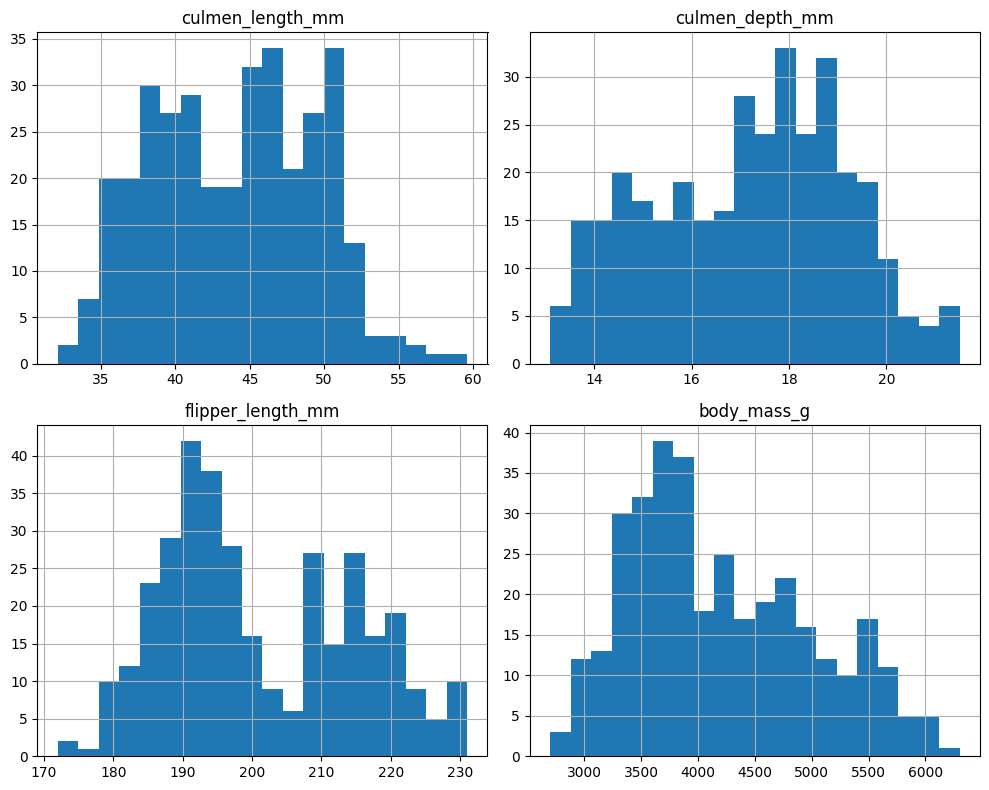

In [ ]:
df.hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()


In [ ]:
species_counts = df['species'].value_counts()
island_counts = df['island'].value_counts()
sex_counts = df['sex'].value_counts()

species_counts, island_counts, sex_counts


(species
 Adelie       152
 Gentoo       124
 Chinstrap     68
 Name: count, dtype: int64,
 island
 Biscoe       168
 Dream        124
 Torgersen     52
 Name: count, dtype: int64,
 sex
 MALE      176
 FEMALE    167
 .           1
 Name: count, dtype: int64)

<Axes: ylabel='culmen_length_mm'>

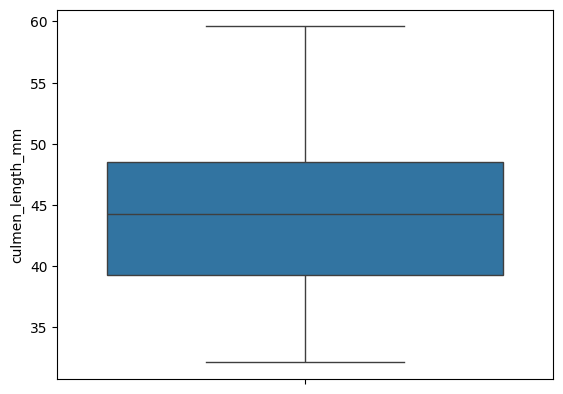

In [ ]:
sns.boxplot(df.culmen_length_mm)

<ipython-input-44-24e9b5890c61>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.culmen_length_mm)


<Axes: xlabel='culmen_length_mm', ylabel='Density'>

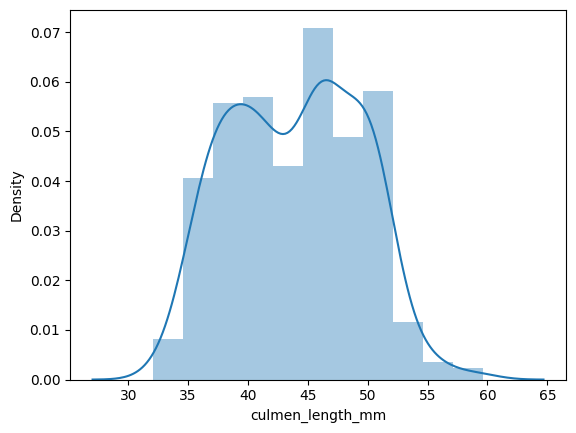

In [ ]:
sns.distplot(df.culmen_length_mm)

In [ ]:
species_counts = df['species'].value_counts()


([<matplotlib.patches.Wedge at 0x7bd97dfbff70>,
 [Text(-0.8483608859631749, -0.700202690060369, 'Adelie'),
  Text(1.097382384060413, 0.07584130242740005, 'Gentoo'),
  Text(-0.27390480729519984, 1.0653525972843825, 'Chinstrap')],
 [Text(-0.462742301434459, -0.3819287400329285, '44.2%'),
  Text(0.598572209487498, 0.041367983142218206, '36.0%'),
  Text(-0.14940262216101807, 0.5811014167005721, '19.8%')])

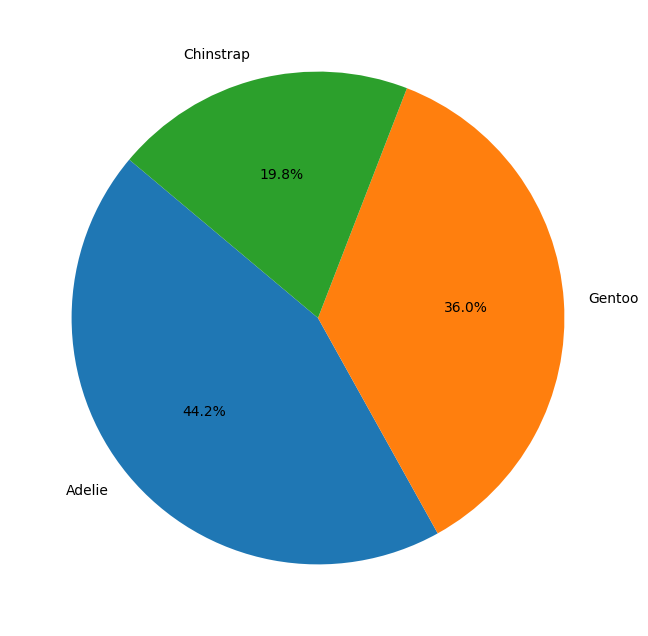

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=140)


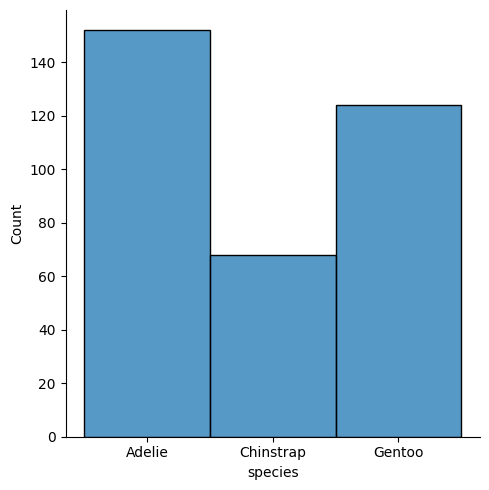

In [ ]:
sns.displot(df['species'])

In [ ]:
plt.show()

In [ ]:
print(sex_counts)


sex
MALE      176
FEMALE    167
.           1
Name: count, dtype: int64


In [ ]:
df['sex'] = df['sex'].dropna()
sex_counts = df['sex'].value_counts()


([<matplotlib.patches.Wedge at 0x7bd97dc0f9d0>,
 [Text(-0.6758193929593329, -0.8679102189167258, 'MALE'),
  Text(0.6837173259691061, 0.8617021632615618, 'FEMALE'),
  Text(-0.8361565217283514, 0.7147323073509025, '.')],
 [Text(-0.36862875979599974, -0.4734055739545776, '51.2%'),
  Text(0.37293672325587596, 0.47001936177903364, '48.5%'),
  Text(-0.4560853754881916, 0.389853985827765, '0.3%')])

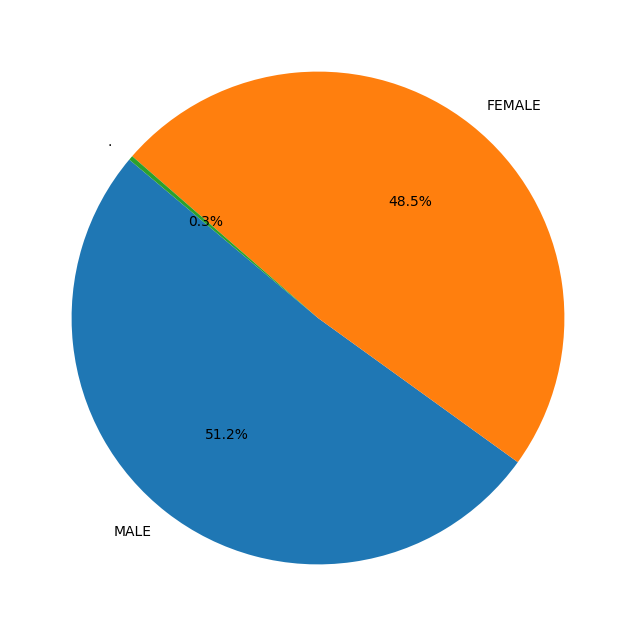

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140)



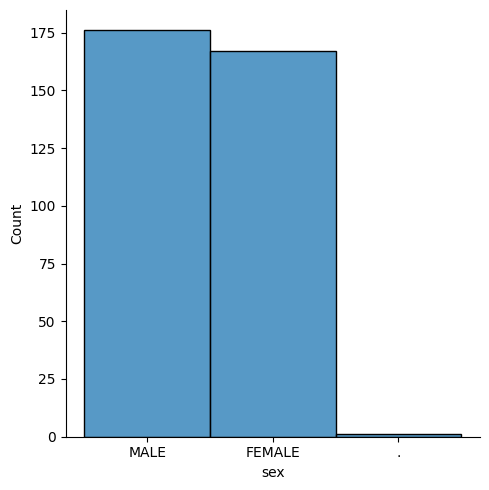

In [ ]:
sns.displot(df['sex'])

**2.Bivariant**

<ipython-input-70-c63470c207c1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = df['species'],y = df['body_mass_g'], palette = 'pastel', data =df)


<Axes: xlabel='species', ylabel='body_mass_g'>

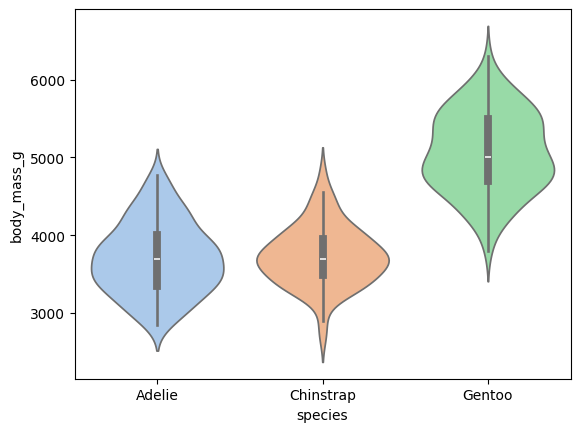

In [ ]:
sns.violinplot(x = df['species'],y = df['body_mass_g'], palette = 'pastel', data =df)

<ipython-input-71-95c8cff9dd55>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='species', y='flipper_length_mm', palette='pastel', data=df)


<Axes: xlabel='species', ylabel='flipper_length_mm'>

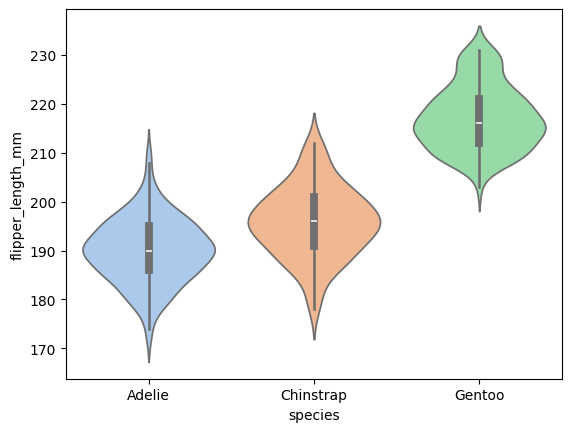

In [ ]:
sns.violinplot(x='species', y='flipper_length_mm', palette='pastel', data=df)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


<ipython-input-72-13e308530646>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='species', y='culmen_depth_mm', palette='pastel', data=df)


<Axes: xlabel='species', ylabel='culmen_depth_mm'>

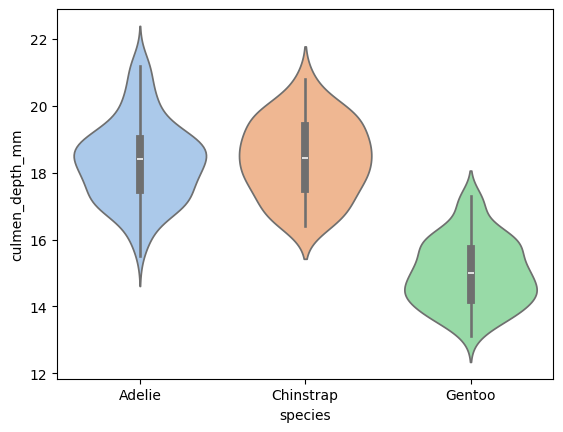

In [ ]:
sns.violinplot(x='species', y='culmen_depth_mm', palette='pastel', data=df)


<ipython-input-73-5e6e80fded47>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='species', y='culmen_length_mm', palette='pastel', data=df)


<Axes: xlabel='species', ylabel='culmen_length_mm'>

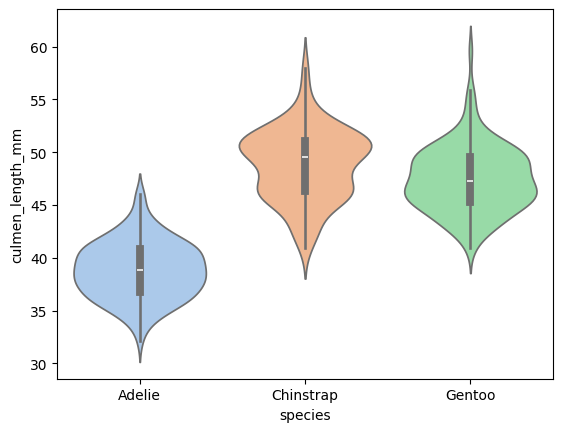

In [ ]:
sns.violinplot(x='species', y='culmen_length_mm', palette='pastel', data=df)


<ipython-input-74-c791d48547ea>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='species', y='body_mass_g', kind='box', data=df, palette='flare')


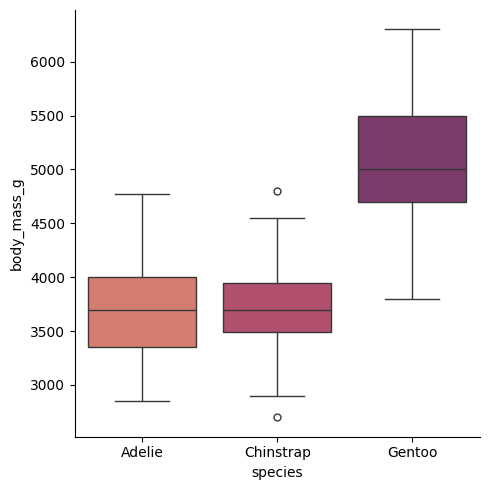

In [ ]:
sns.catplot(x='species', y='body_mass_g', kind='box', data=df, palette='flare')


<ipython-input-75-1b5d85652c0a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='species', y='culmen_length_mm', kind='box', data=df, palette='flare')


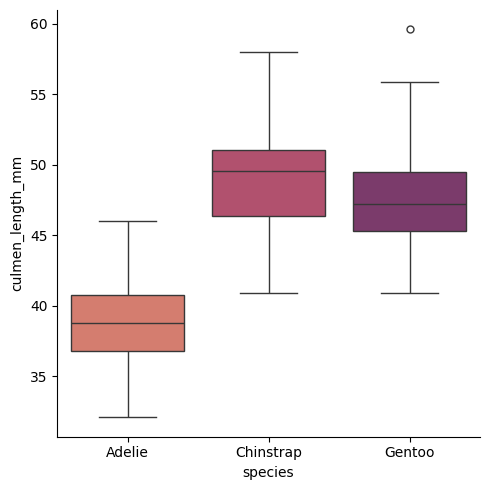

In [ ]:
sns.catplot(x='species', y='culmen_length_mm', kind='box', data=df, palette='flare')

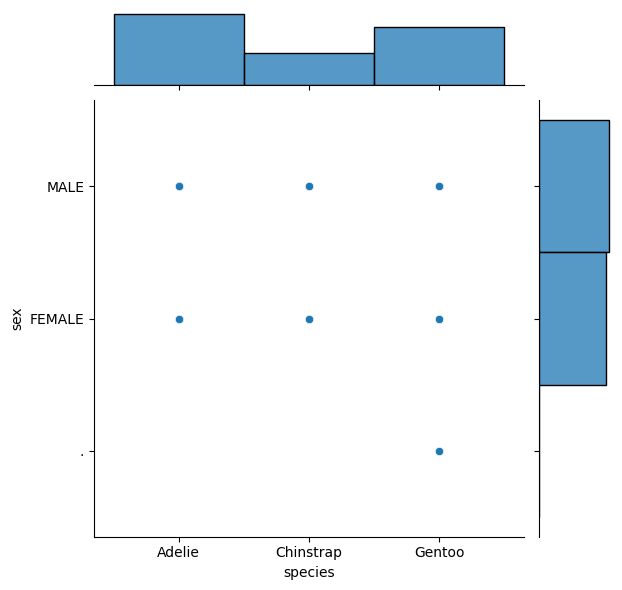

In [ ]:
sns.jointplot(x='species', y='sex', data=df,
              kind='scatter', palette='pastel')


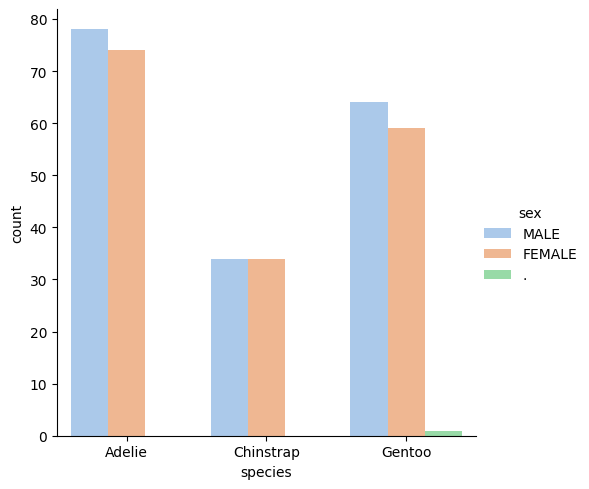

In [ ]:
sns.catplot(x='species', hue='sex', kind='count', data=df, palette='pastel')

<Axes: xlabel='culmen_length_mm', ylabel='flipper_length_mm'>

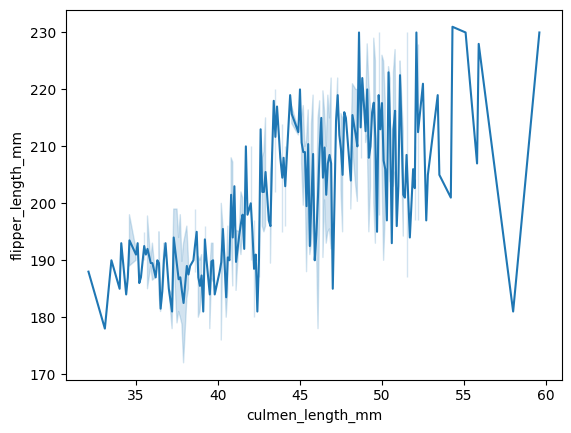

In [ ]:
sns.lineplot(x=df.culmen_length_mm, y=df.flipper_length_mm)


<Axes: xlabel='culmen_depth_mm', ylabel='body_mass_g'>

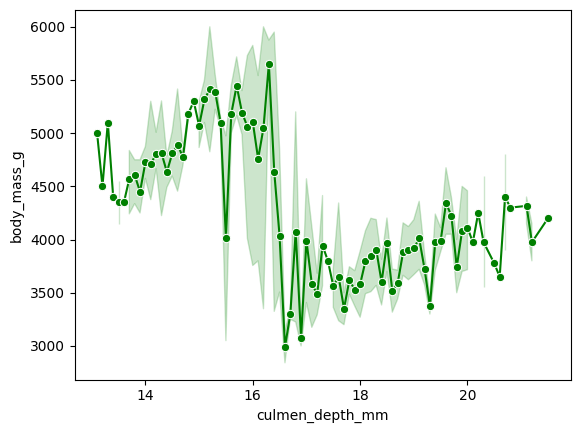

In [ ]:
sns.lineplot(x='culmen_depth_mm', y='body_mass_g', data=df, marker='o', color='g')

#3.Multi-Variate Analysis

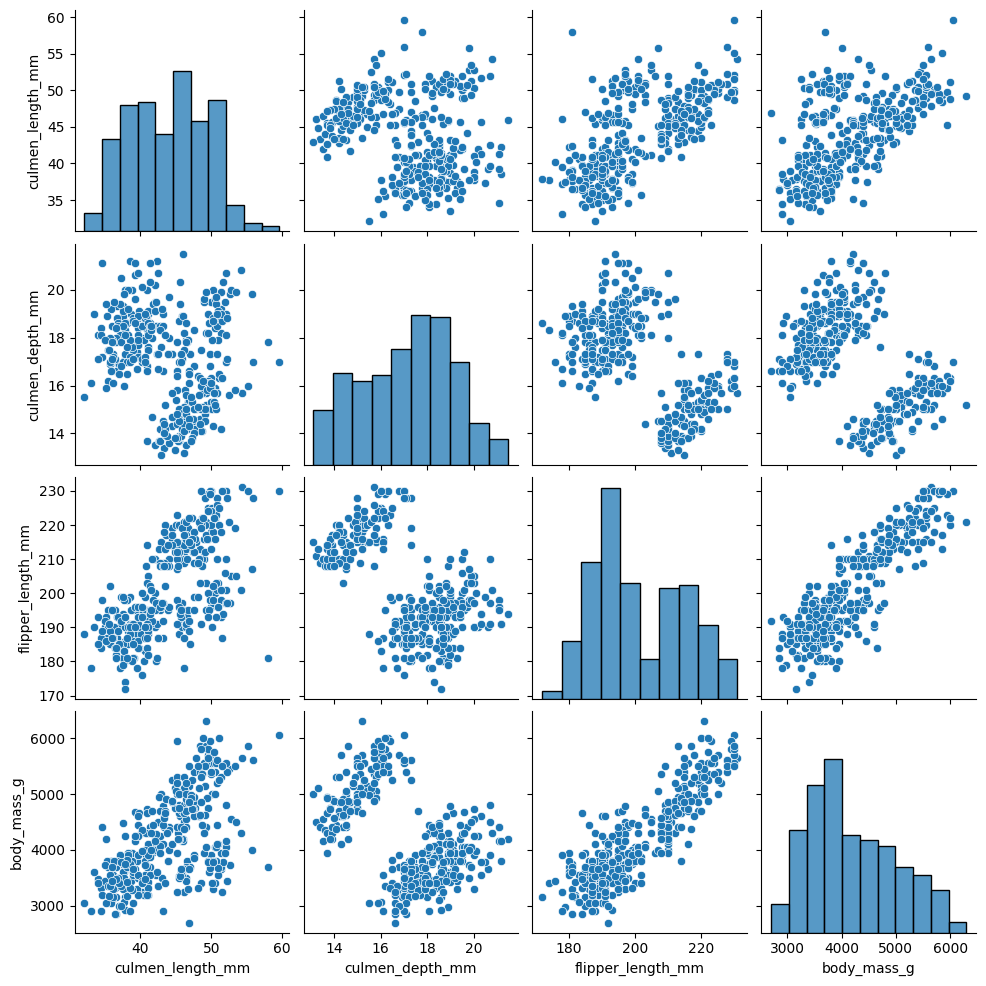

In [ ]:
print(sns.pairplot(df))

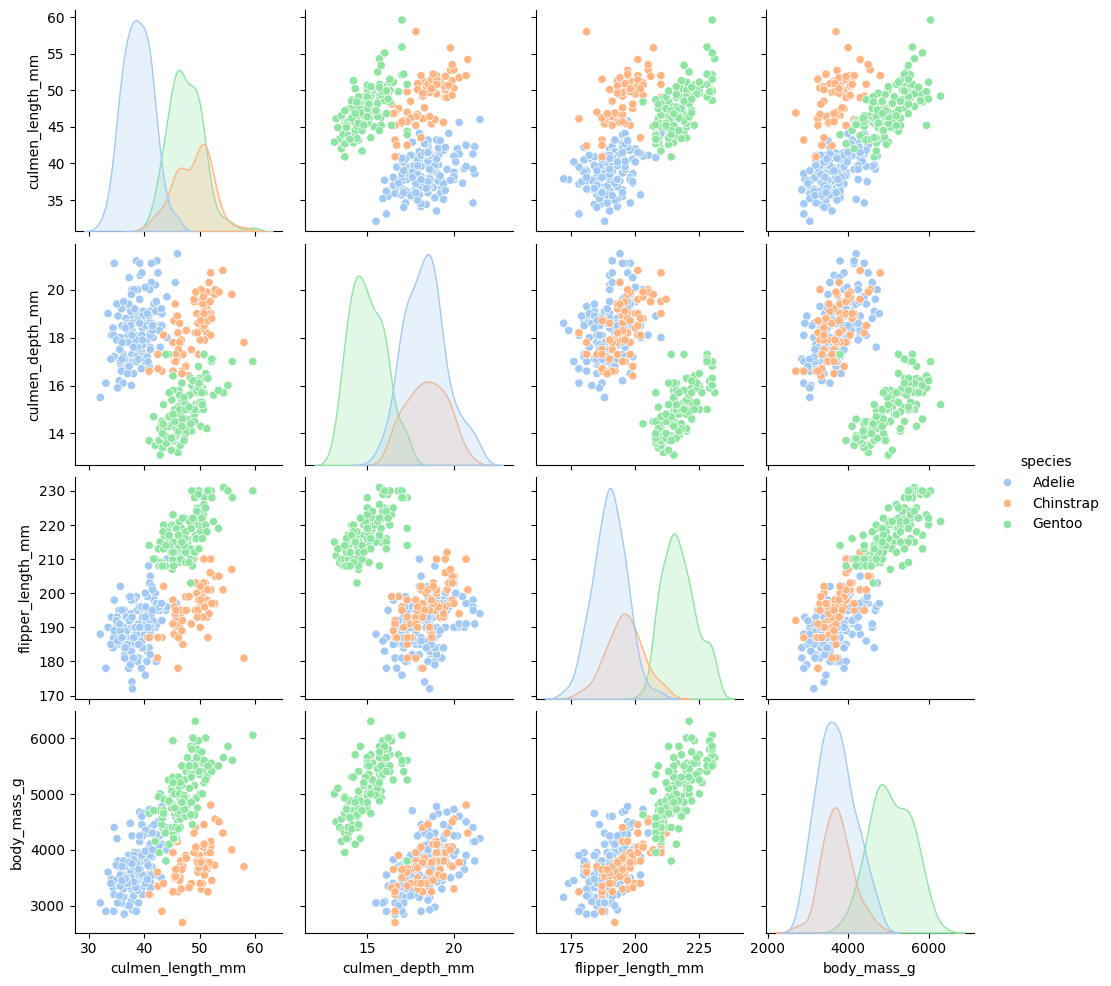

In [ ]:
 sns.pairplot(df, hue='species', palette='pastel')

In [ ]:
df1=df.copy()
df1.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.50000,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.30000,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,43.92193,17.3,195.0,3800.0,FEMALE
4,Adelie,Torgersen,36.70000,19.3,193.0,3450.0,FEMALE


In [ ]:
corr_matrix = df1[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].corr()
corr_matrix


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235049,0.655181,0.594675
culmen_depth_mm,-0.235049,1.000000,-0.582840,-0.471783
flipper_length_mm,0.655181,-0.582840,1.000000,0.868495
body_mass_g,0.594675,-0.471783,0.868495,1.000000


<Axes: >

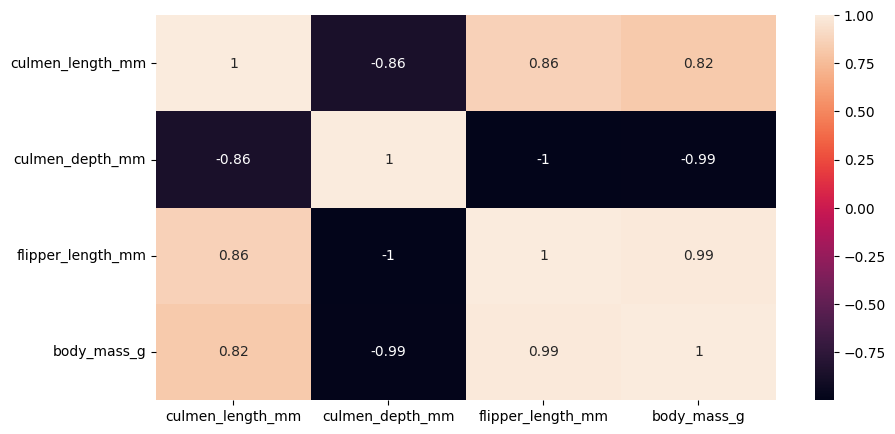

In [ ]:
plt.figure(figsize =(10,5))
sns.heatmap(corr_matrix.corr(), annot =True)

In [ ]:
numeric_values=df.iloc

# . **Check descriptive statistics**

In [ ]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,43.921930,17.152035,200.936047,4199.418605
std,5.443643,1.969060,14.042064,800.197923
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.600000,190.000000,3550.000000
50%,44.250000,17.300000,197.000000,4025.000000
75%,48.500000,18.700000,213.250000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


# *Check correlation of the data*

In [ ]:
corr_matrix = df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].corr()


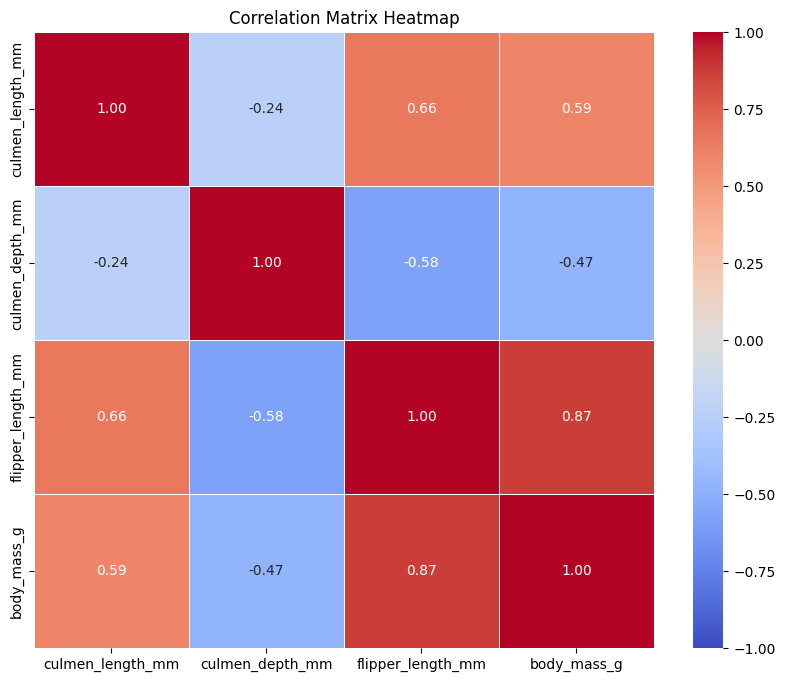

In [ ]:
corr_matrix = df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Check for Missing values and deal with them.

In [ ]:
# Check for missing values
missing_values = df.isna().sum()

# Display missing values per column
print("Missing values per column:")
print(missing_values)


Missing values per column:
species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [ ]:

missing_values = df.isna().sum()
print("Missing values per column:")
print(missing_values)
df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean(), inplace=True)
df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].mean(), inplace=True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean(), inplace=True)
df['body_mass_g'].fillna(df['body_mass_g'].mean(), inplace=True)
df['species'].fillna(df['species'].mode()[0], inplace=True)
df['island'].fillna(df['island'].mode()[0], inplace=True)
df['sex'].fillna(df['sex'].mode()[0], inplace=True)
missing_values_after = df.isna().sum()
print("Missing values per column after handling:")
print(missing_values_after)



Missing values per column:
species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64
Missing values per column after handling:
species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


# Outliers

using a boxplot with **Seaborn**

<Axes: ylabel='culmen_length_mm'>

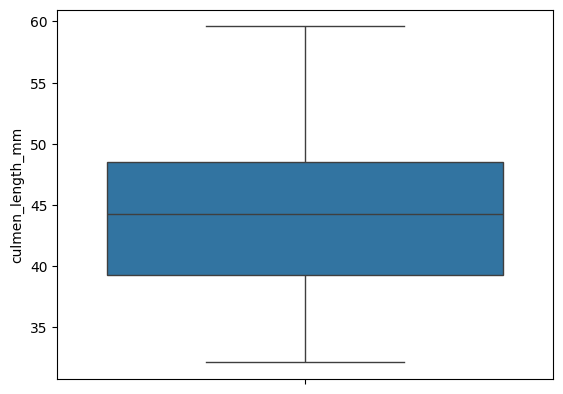

In [ ]:
sns.boxplot(df.culmen_length_mm)

 **by using Z-score**

In [ ]:
from scipy import stats
z_scores = np.abs(stats.zscore(df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]))
threshold = 3
outliers = (z_scores > threshold).any(axis=1)
print("Number of outliers detected using Z-score:", np.sum(outliers))

Number of outliers detected using Z-score: 0


# Check for Categorical columns and perform encoding.

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = df.select_dtypes(include=['object']).columns

# Label Encoding (if applicable)
label_encoder = LabelEncoder()
for col in categorical_columns:
    if df[col].nunique() < 10:  # Apply Label Encoding to columns with fewer unique values
        df[col] = label_encoder.fit_transform(df[col])

# One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

print("Encoding completed.")
print(df_encoded.head())

Encoding completed.
   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0          39.10000             18.7              181.0       3750.0   
1          39.50000             17.4              186.0       3800.0   
2          40.30000             18.0              195.0       3250.0   
3          43.92193             17.3              195.0       3800.0   
4          36.70000             19.3              193.0       3450.0   

   species_1  species_2  island_1  island_2  sex_1  sex_2  
0      False      False     False      True  False   True  
1      False      False     False      True   True  False  
2      False      False     False      True   True  False  
3      False      False     False      True   True  False  
4      False      False     False      True   True  False  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    int64  
 1   island             344 non-null    int64  
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 18.9 KB


# Split the data into dependent and independent variables.

In [ ]:
# prompt: Split the data into dependent and independent variables.

# Assuming 'species' is the dependent variable and the rest are independent
X = df.drop('species', axis=1)  # Independent variables
y = df['species']  # Dependent variable


In [ ]:
print("Independent variables (X):")
print(X.head())

print("Dependent variable (y):")
print(y.head())

Independent variables (X):
   island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0       2          39.10000             18.7              181.0       3750.0   
1       2          39.50000             17.4              186.0       3800.0   
2       2          40.30000             18.0              195.0       3250.0   
3       2          43.92193             17.3              195.0       3800.0   
4       2          36.70000             19.3              193.0       3450.0   

   sex  
0    2  
1    1  
2    1  
3    1  
4    1  
Dependent variable (y):
0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64


# Scaling

In [ ]:


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # Assign output to X_scaled
print("Shape of scaled independent variables (X_scaled):", X_scaled.shape)
print("First few rows of scaled data:")
print(X_scaled[:5]) # Print X_scaled

Shape of scaled independent variables (X_scaled): (344, 6)
First few rows of scaled data:
[[ 1.84407623e+00 -8.87081226e-01  7.87289385e-01 -1.42180566e+00
  -5.62452418e-01  9.71472957e-01]
 [ 1.84407623e+00 -8.13493989e-01  1.26114149e-01 -1.06521398e+00
  -4.99876858e-01 -1.00596312e+00]
 [ 1.84407623e+00 -6.66319516e-01  4.31271951e-01 -4.23348960e-01
  -1.18820802e+00 -1.00596312e+00]
 [ 1.84407623e+00 -1.50474431e-16  7.52545159e-02 -4.23348960e-01
  -4.99876858e-01 -1.00596312e+00]
 [ 1.84407623e+00 -1.32860464e+00  1.09244719e+00 -5.65985632e-01
  -9.37905779e-01 -1.00596312e+00]]


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the independent variables
X_scaled = scaler.fit_transform(X)

print("Data after Min-Max Scaling:")
print(X_scaled[:5])  # Print the first 5 rows of scaled data



Data after Min-Max Scaling:
[[1.         0.25454545 0.66666667 0.15254237 0.29166667 1.        ]
 [1.         0.26909091 0.51190476 0.23728814 0.30555556 0.5       ]
 [1.         0.29818182 0.58333333 0.38983051 0.15277778 0.5       ]
 [1.         0.42988836 0.5        0.38983051 0.30555556 0.5       ]
 [1.         0.16727273 0.73809524 0.3559322  0.20833333 0.5       ]]


# Split the data into training and testing

In [ ]:

from sklearn.model_selection import train_test_split

df_encoded = df

# Define the dependent variable (target) and independent variables (features)
X = df_encoded.drop('species', axis=1)  # Independent variables
y = df_encoded['species']        # Dependent variable

# Split the data into training and testing sets
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

# Convert to DataFrame for better readability
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)
y_train_df = pd.DataFrame(y_train.reset_index(drop=True), columns=['species'])
y_test_df = pd.DataFrame(y_test.reset_index(drop=True), columns=['species'])





In [ ]:
X_train_df.shape

(275, 6)

In [ ]:
X_test_df.shape

(69, 6)

In [ ]:
X_train_df.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
66,0,35.5,16.2,195.0,3350.0,1
229,0,46.8,15.4,215.0,5150.0,2
7,2,39.2,19.6,195.0,4675.0,2
140,1,40.2,17.1,193.0,3400.0,1
323,0,49.1,15.0,228.0,5500.0,2


In [ ]:
X_test_df.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
194,1,50.9,19.1,196.0,3550.0,2
157,1,45.2,17.8,198.0,3950.0,1
225,0,46.5,13.5,210.0,4550.0,1
208,1,45.2,16.6,191.0,3250.0,1
318,0,48.4,14.4,203.0,4625.0,1


In [ ]:
y_train_df.head()

,species
0,0
1,2
2,0
3,0
4,2


In [ ]:
y_test_df.head()

,species
0,1
1,1
2,2
3,1
4,2


In [ ]:
# Display the first few rows of each dataset
print("First few rows of training features (X_train):")
print(X_train_df.head())

print("\nFirst few rows of testing features (X_test):")
print(X_test_df.head())

print("\nFirst few rows of training target (y_train):")
print(y_train_df.head())

print("\nFirst few rows of testing target (y_test):")
print(y_test_df.head())

First few rows of training features (X_train):
     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
66        0              35.5             16.2              195.0   
229       0              46.8             15.4              215.0   
7         2              39.2             19.6              195.0   
140       1              40.2             17.1              193.0   
323       0              49.1             15.0              228.0   

     body_mass_g  sex  
66        3350.0    1  
229       5150.0    2  
7         4675.0    2  
140       3400.0    1  
323       5500.0    2  

First few rows of testing features (X_test):
     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
194       1              50.9             19.1              196.0   
157       1              45.2             17.8              198.0   
225       0              46.5             13.5              210.0   
208       1              45.2             16.6              191.0   
318

# Check the dataset is balanced or not

Class distribution in the target variable (species):
species
0    152
2    124
1     68
Name: count, dtype: int64


<ipython-input-147-c62ee7c8ffc6>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='pastel')


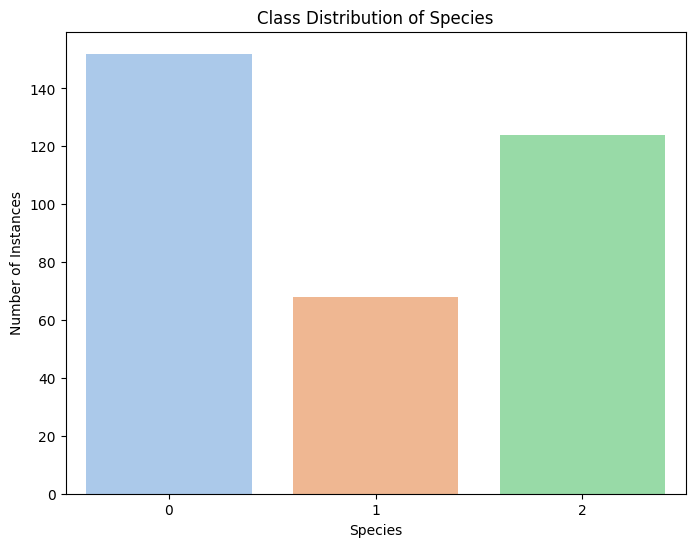

In [ ]:
# Check the distribution of the target variable
class_distribution = y.value_counts()
print("Class distribution in the target variable (species):")
print(class_distribution)

# Visualize the class distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='pastel')
plt.title('Class Distribution of Species')
plt.xlabel('Species')
plt.ylabel('Number of Instances')
plt.show()


# Random oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Initialize the oversampler
ros = RandomOverSampler(random_state=42)

# Apply the oversampler to the training data
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Check the new class distribution
print("New class distribution after oversampling:")
print(y_resampled.value_counts())


New class distribution after oversampling:
species
0    120
2    120
1    120
Name: count, dtype: int64


<ipython-input-151-898fa289e2b6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette='pastel')


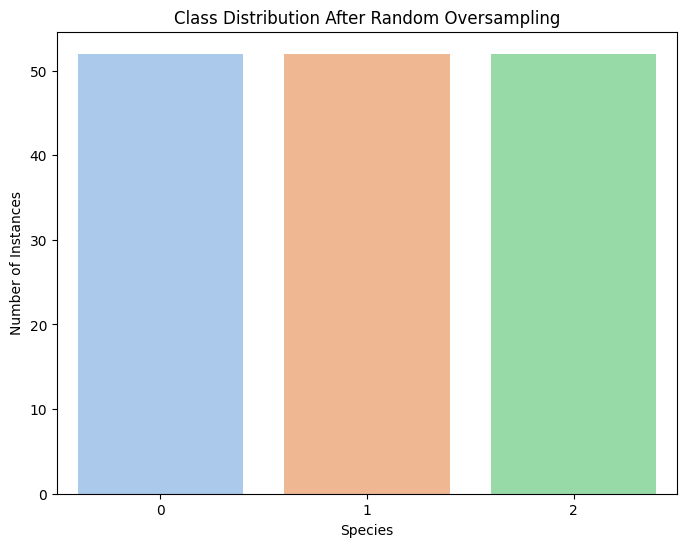

In [ ]:
 plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled, palette='pastel')
plt.title('Class Distribution After Random Oversampling')
plt.xlabel('Species')
plt.ylabel('Number of Instances')
plt.show()

# Perform machine learning model building
**Random Forest Classifier**

# Train the Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_model.predict(X_test)


# Evaluate the Model

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy of the Random Forest model:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy of the Random Forest model: 1.0

Confusion Matrix:
[[32  0  0]
 [ 0 16  0]
 [ 0  0 21]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        21

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



# Testing the model with random values

In [ ]:
import numpy as np
import pandas as pd # Added import statement for pandas

# Select a random sample from the test set
random_indices = np.random.choice(X_test.shape[0], size=5, replace=False)
X_random_test = X_test.iloc[random_indices] # Use .iloc to select rows
y_random_test = y_test.iloc[random_indices]

# Predict using the trained model
y_random_pred = rf_model.predict(X_random_test)

# Create a DataFrame to compare the actual and predicted labels
comparison_df = pd.DataFrame({
    'Actual': y_random_test,
    'Predicted': y_random_pred
})

# Display the results
print("Random observations - Actual vs Predicted:")
print(comparison_df)

Random observations - Actual vs Predicted:
     Actual  Predicted
5         0          0
57        0          0
33        0          0
110       0          0
193       1          1


**SVM Model**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Train the SVM model
svm_model.fit(X_train, y_train)

# Predict on the test data
y_pred_svm = svm_model.predict(X_test)


In [ ]:
# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

print("Accuracy of the SVM model:", accuracy_svm)
print("\nConfusion Matrix:")
print(conf_matrix_svm)
print("\nClassification Report:")
print(class_report_svm)


Accuracy of the SVM model: 0.9710144927536232

Confusion Matrix:
[[31  1  0]
 [ 0 16  0]
 [ 1  0 20]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       0.94      1.00      0.97        16
           2       1.00      0.95      0.98        21

    accuracy                           0.97        69
   macro avg       0.97      0.97      0.97        69
weighted avg       0.97      0.97      0.97        69



In [ ]:
# Select a random sample from the test set
random_indices_svm = np.random.choice(X_test.shape[0], size=5, replace=False)
X_random_test_svm = X_test.iloc[random_indices_svm] # Use .iloc to select rows by index
y_random_test_svm = y_test.iloc[random_indices_svm]

# Predict using the SVM model
y_random_pred_svm = svm_model.predict(X_random_test_svm)

# Create a DataFrame to compare the actual and predicted labels
comparison_df_svm = pd.DataFrame({
    'Actual': y_random_test_svm,
    'Predicted': y_random_pred_svm
})

# Display the results
print("Random observations - Actual vs Predicted (SVM):")
print(comparison_df_svm)

Random observations - Actual vs Predicted (SVM):
     Actual  Predicted
255       2          2
299       2          2
46        0          0
33        0          0
219       1          1


In [ ]:
# Check accuracy on the training data
y_train_pred = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy of Random Forest model:", train_accuracy)

# Check accuracy on the test data
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy of Random Forest model:", test_accuracy)


Training Accuracy of Random Forest model: 1.0
Test Accuracy of Random Forest model: 1.0


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the entire dataset
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", np.mean(cv_scores))


Cross-validation scores: [0.98550725 1.         0.98550725 1.         0.98529412]
Average cross-validation score: 0.9912617220801364


# conclusion
* After comparing the both model( SVM and RandomForestClassifier).
the RFC is giving 100% accuracy which indicated the overfittig therefore the cross validation is used.
SVM gave an accuracy of 97%